# Proyecto IMT2200 - Análisis de Datos

En este notebook, revisaremos y analizaremos los datos obtenidos hasta el momento, con el objetivo de responder las preguntas de investigación planteadas al inicio del proyecto. A lo largo de este análisis, profundizaremos en los distintos aspectos y patrones presentes en los datos para ofrecer conclusiones informadas y relevantes para cada pregunta de interés.

In [1]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import numpy as np
import matplotlib.pylab as plt

## Apertura de Datos Económicos

A continuación, procederemos a cargar los datos desde la carpeta que contiene la información recopilada sobre economía. Estos datos serán la base de nuestro análisis para explorar las tendencias y relaciones económicas clave en el contexto de nuestro proyecto.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_economia = pd.read_parquet("/content/drive/MyDrive/CD-FINAL/datos de economia/DataFrames_economia.parquet")
df_economia.info()
df_economia

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   fecha                            78 non-null     datetime64[ns]
 1   PIB_precio_corriente             72 non-null     float64       
 2   PIB_volumen_encadenado           72 non-null     float64       
 3   PIB_volumen_desestacionalizado   72 non-null     float64       
 4   ingreso_mediano_real             75 non-null     float64       
 5   mineria                          75 non-null     float64       
 6   manufactura                      75 non-null     float64       
 7   electricidad                     75 non-null     float64       
 8   suministro_agua                  75 non-null     float64       
 9   construccion                     75 non-null     float64       
 10  comercio_mayorista_minorista     75 non-null     float64       


,fecha,PIB_precio_corriente,PIB_volumen_encadenado,PIB_volumen_desestacionalizado,ingreso_mediano_real,mineria,manufactura,electricidad,suministro_agua,construccion,...,servicios_administrativos_apoyo,administracion_publica,educacion,salud_humana,arte_entretenimiento,fuerza_laboral_trimestral,empleo_trimestral,tasa_desempleo,IPC,IPSA
0,2018-01-01,46986.271371,46511.870532,46837.401890,109.38,105.82,107.48,112.61,109.26,110.41,...,107.46,111.54,112.71,107.82,105.61,9438.115290,8793.922635,6.825437,74.27,5855.38
1,2018-02-01,46986.271371,46511.870532,46837.401890,108.97,105.75,107.39,110.06,109.40,110.93,...,103.69,111.32,112.85,108.88,104.70,9449.494321,8787.079741,7.010053,74.31,5602.83
2,2018-03-01,46986.271371,46511.870532,46837.401890,109.53,105.57,107.93,112.35,114.01,110.93,...,106.72,111.84,112.29,110.55,105.31,9456.608476,8759.080753,7.376088,74.46,5542.22
3,2018-04-01,47033.691982,47707.607554,47461.533987,109.84,107.08,108.77,110.00,110.75,111.72,...,105.35,111.71,112.48,110.81,105.57,9441.395486,8781.083740,6.993794,74.70,5710.90
4,2018-05-01,47033.691982,47707.607554,47461.533987,109.69,105.03,108.61,111.30,110.72,112.88,...,106.15,111.34,112.78,111.01,104.66,9465.329449,8766.651220,7.381446,74.90,5455.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2024-02-01,NaN,NaN,NaN,158.13,160.50,160.70,152.19,162.73,158.77,...,155.63,149.66,158.40,159.65,164.47,10174.908428,9309.608094,8.504257,102.32,6449.88
74,2024-03-01,NaN,NaN,NaN,159.19,163.57,161.52,159.05,163.00,159.10,...,156.55,150.97,160.43,161.30,167.77,10193.230625,9308.684701,8.677778,102.70,6643.76
75,2024-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10209.534117,9339.295511,8.523784,103.24,6511.93
76,2024-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10177.707624,9331.646959,8.312880,103.52,6632.80


## Carga de Datos del Índice de Criminalidad
A continuación, procederemos a cargar los datos almacenados en la carpeta que contiene información sobre los índices de criminalidad en las comunas de la Región Metropolitana de Chile. Estos datos servirán como base para nuestro análisis, permitiéndonos examinar las variaciones y tendencias en el contexto del proyecto.

In [4]:
df_ind_crime = pd.read_parquet("/content/drive/MyDrive/CD-FINAL/datos de indice de criminalidad/DataFrames_total.parquet")
df_ind_crime.info()
df_ind_crime

<class 'pandas.core.frame.DataFrame'>
Index: 13104 entries, 1 to 84
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Delitos violentos                         13104 non-null  float64       
 1   Delitos asociados a drogas                13104 non-null  float64       
 2   Delitos asociados a armas                 13104 non-null  float64       
 3   Delitos contra la propiedad no violentos  13104 non-null  float64       
 4   Incivilidades                             13104 non-null  float64       
 5   Otros delitos o faltas                    13104 non-null  float64       
 6   fecha                                     13104 non-null  datetime64[ns]
 7   Comuna_name                               13104 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 921.4+ KB


,Delitos violentos,Delitos asociados a drogas,Delitos asociados a armas,Delitos contra la propiedad no violentos,Incivilidades,Otros delitos o faltas,fecha,Comuna_name
1,45.0,0.0,5.0,85.0,91.0,69.0,2018-01-01,Santiago
2,47.0,3.0,1.0,61.0,106.0,89.0,2018-02-01,Santiago
3,35.0,1.0,0.0,43.0,44.0,57.0,2018-03-01,Santiago
4,30.0,1.0,1.0,40.0,36.0,47.0,2018-04-01,Santiago
5,24.0,1.0,3.0,46.0,46.0,50.0,2018-05-01,Santiago
...,...,...,...,...,...,...,...,...
80,0.0,0.0,0.0,0.0,0.0,0.0,2024-08-01,Reñaca
81,0.0,0.0,0.0,0.0,0.0,0.0,2024-09-01,Reñaca
82,0.0,0.0,0.0,0.0,0.0,0.0,2024-10-01,Reñaca
83,0.0,0.0,0.0,0.0,0.0,0.0,2024-11-01,Reñaca


## Carga de Datos del Índice de Corrupción
A continuación, cargaremos los datos almacenados en la carpeta que contiene información sobre los índices de corrupción en las comunas de la Región Metropolitana de Chile. Estos datos constituirán la base de nuestro análisis, permitiéndonos examinar variaciones y tendencias relevantes dentro del contexto del proyecto. Cabe mencionar que, no se ha logrado obtener una gran cantidad de información en esta área.

In [5]:
df_corrupcion = pd.read_parquet("/content/drive/MyDrive/CD-FINAL/datos de corupcion/DataFrames_corupcion.parquet")
df_corrupcion.info()
df_corrupcion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Año          14 non-null     int64  
 1   Año inicio   8 non-null      float64
 2   Año fin      8 non-null      float64
 3   Monto        14 non-null     object 
 4   Sector       14 non-null     object 
 5   Comuna       14 non-null     object 
 6   Posición     13 non-null     object 
 7   Perjudicado  9 non-null      object 
 8   Delitos      12 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.1+ KB


,Año,Año inicio,Año fin,Monto,Sector,Comuna,Posición,Perjudicado,Delitos
0,2024,NaN,NaN,41.000.000.000,Derecha,Maipú,Alcalde,Municipio,fraude al fisco y falsificación de instrumento...
1,2021,2017.0,2020.0,10.210.000.000,Centro,San Joaquín,Alcalde,Municipio,saldos no rendidos ni justificados
2,2024,NaN,NaN,8.000.000.000,Derecha,Las Condes,Alcalde,None,"fraude al fisco, asignación de horas extras"
3,2023,NaN,NaN,4.500.000.000,Derecha,Vitacura,Alcalde,Municipio,"malversación de caudales públicos, fraude al F..."
4,2020,2020.0,2022.0,1.600.000.000,Izquierda,Providencia,Funcionario municipal,Municipio,"malversación de caudales públicos, aplicación ..."
5,2022,2020.0,2023.0,1.291.937.035,Izquierda,Recoleta,Alcalde,None,None
6,2020,2020.0,2024.0,816.000.000,Derecha,Santiago,None,Fisco,"corrupción, soborno, cohecho, financiamiento i..."
7,2018,NaN,NaN,680.000.000,Derecha,Lo Barnechea,Alcalde,Municipio,"malversación de caudales públicos, fraude al F..."
8,2024,2019.0,2024.0,200.000.000,Izquierda,Recoleta,Alcalde,None,"cohecho, administración desleal, fraude al Fis..."
9,2021,NaN,NaN,188.000.000,Derecha,Santiago,Alcalde,None,"Pagos de horas extra, pagos de honorarios"


## Carga de Archivos Geolocalizados
A continuación, cargaremos el archivo que contiene información geolocalizada. Esto nos permitirá crear representaciones gráficas para visualizar mejor los cambios y tendencias, especialmente en aquellos aspectos clave que queremos analizar en el contexto del proyecto.

In [ ]:
%cd "datos de mapas"

df_mapa = gpd.read_file("comunas.shp")

%cd ..

print(list(df_mapa.columns))
df_mapa.info()
df_mapa #(mi computadora tiene errores con esto... no se porque)

c:\Users\Jose\Documents\GitHub\imt2200---actividad-2024\datos de mapas
c:\Users\Jose\Documents\GitHub\imt2200---actividad-2024
['objectid', 'shape_leng', 'dis_elec', 'cir_sena', 'cod_comuna', 'codregion', 'st_area_sh', 'st_length_', 'Region', 'Comuna', 'Provincia', 'geometry']
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    346 non-null    int64   
 1   shape_leng  346 non-null    float64 
 2   dis_elec    346 non-null    int64   
 3   cir_sena    346 non-null    int64   
 4   cod_comuna  346 non-null    int64   
 5   codregion   346 non-null    int64   
 6   st_area_sh  346 non-null    float64 
 7   st_length_  346 non-null    float64 
 8   Region      346 non-null    object  
 9   Comuna      346 non-null    object  
 10  Provincia   346 non-null    object  
 11  geometry    346 non-null    geometry
dtypes: float64(3), g

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-7992818.789 -4056669.319, -7992731...."
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-7831651.813 -4022443.109, -7831596...."
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Coinco,Cachapoal,"POLYGON ((-7892616.357 -4060673.364, -7892621...."
3,31,89840.903562,15,8,6104,6,3.256572e+08,108874.623150,Región del Libertador Bernardo O'Higgins,Coltauco,Cachapoal,"POLYGON ((-7906457.717 -4051723.734, -7906266...."
4,78,122626.493264,23,11,9121,9,6.990727e+08,156680.410681,Región de La Araucanía,Cholchol,Cautín,"POLYGON ((-8121756.186 -4645860.295, -8121644...."
...,...,...,...,...,...,...,...,...,...,...,...,...
341,255,130240.555805,19,10,16305,16,8.751006e+08,160459.137929,Región de Ñuble,San Nicolás,Punilla,"POLYGON ((-8041950.854 -4349201.562, -8041735...."
342,253,311061.932415,19,10,16304,16,2.393007e+09,388109.613857,Región de Ñuble,San Fabián,Punilla,"POLYGON ((-7931328.549 -4363544.179, -7931320...."
343,245,159257.906431,19,10,16303,16,7.638173e+08,195593.933727,Región de Ñuble,Ñiquén,Punilla,"POLYGON ((-8026032.185 -4319505.012, -8025933...."
344,243,157467.049667,19,10,16104,16,1.044405e+09,196962.664313,Región de Ñuble,El Carmen,Ñuble,"POLYGON ((-7986315.104 -4415272.935, -7986309...."


### ahora nos dedicaremos a principalmente de limpiar los datos y acortar todo para que esten en un rango desde el ano 2018 a mediados de 2024

In [6]:
df_ind_crime = df_ind_crime[(df_ind_crime["fecha"] <= "2024-06-30") & (df_ind_crime["fecha"] >= "2018-01-01")]
df_economia = df_economia[(df_economia["fecha"] <= "2024-06-30") & (df_economia["fecha"] >= "2018-01-01")]

## Manejo de Datos Faltantes en Índices Económicos con Algoritmos de Predicción
Dado que estamos utilizando información económica muy reciente, es común que algunos datos no estén aún disponibles, generando casillas con valores faltantes (NaN) en nuestro DataFrame de índices económicos. Para abordar este problema, hemos decidido realizar pruebas de imputación mediante métodos de predicción, rellenando los datos faltantes con estimaciones fundamentadas. obteniendo así una visión más completa y confiable sobre los posibles valores de los índices que aún no tienen datos disponibles.

In [7]:
df_economia_columns_nan = list(df_economia[df_economia.columns[df_economia.isnull().any()]].columns)
print("la siguiente lista son las colunmas que poseen almenos un dato tipo NaN: \n", df_economia_columns_nan)

la siguiente lista son las colunmas que poseen almenos un dato tipo NaN: 
 ['PIB_precio_corriente', 'PIB_volumen_encadenado', 'PIB_volumen_desestacionalizado', 'ingreso_mediano_real', 'mineria', 'manufactura', 'electricidad', 'suministro_agua', 'construccion', 'comercio_mayorista_minorista', 'transporte_almacenaje', 'alojamiento_alimentos', 'informacion_comunicacion', 'finanzas_seguros', 'bienes_raices', 'servicios_cientificos_tecnicos', 'servicios_administrativos_apoyo', 'administracion_publica', 'educacion', 'salud_humana', 'arte_entretenimiento']


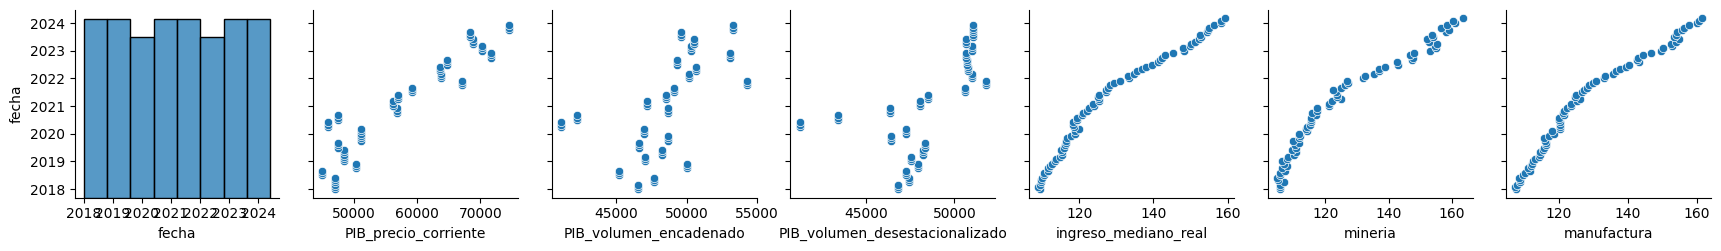

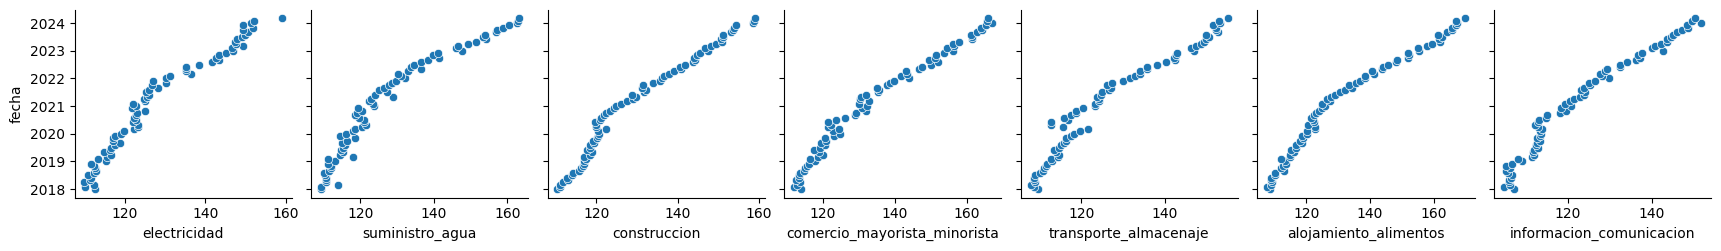

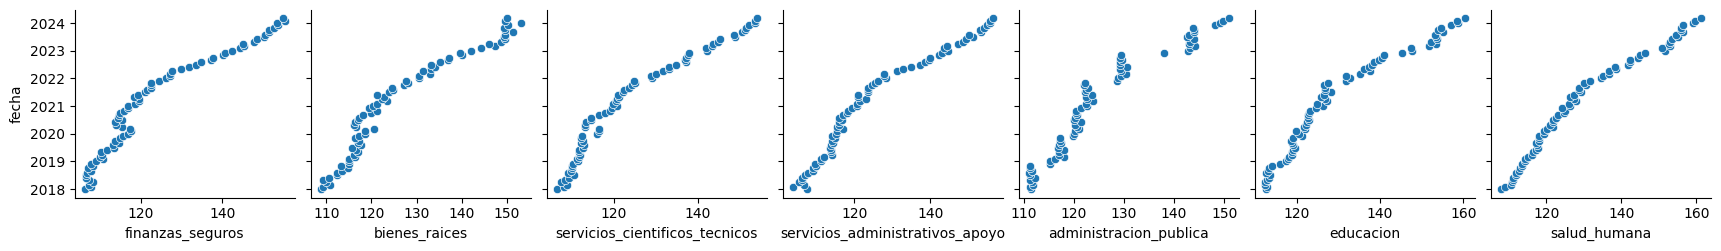

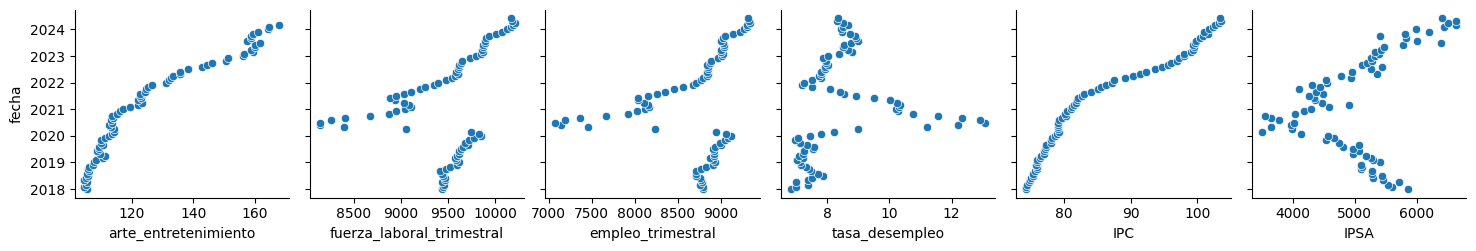

In [8]:
df_economia_columns = list(df_economia.columns)

for i in range(0, len(df_economia_columns), 7):
    sns.pairplot(df_economia, y_vars="fecha", x_vars=df_economia_columns[i : i+7])

In [9]:
# este caso utilizaremos el metodo de KNN (K-Nearest Neighbors)
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

df_economia_1 = df_economia.copy()

# 1. convertir las fechas a un valor int64 (meses desde 2017)
fecha_base = pd.Timestamp("2017-01-01")
df_economia_1['fecha_num'] = (df_economia_1['fecha'].dt.year - fecha_base.year) * 12 + df_economia_1['fecha'].dt.month - fecha_base.month

# 2. usar KNNImputer para imputar los valores nulos
imputer = KNNImputer(n_neighbors=5)

# 3. seleccionar las columnas numericas
columnas_numericas = list(df_economia_1.select_dtypes(include=['float64', 'int64']).columns)

# 4. escalar las columnas antes de la imputacion
scaler = StandardScaler()
df_economia_1_scaled = df_economia_1.copy()  # por alguna razon se modifco el original cuando no devia, asique hacemos una copia
df_economia_1_scaled[columnas_numericas] = scaler.fit_transform(df_economia_1_scaled[columnas_numericas])

# 5. imputar los valores nulos en las columnas numericas
df_economia_1_scaled[columnas_numericas] = imputer.fit_transform(df_economia_1_scaled[columnas_numericas])

# 6. volver las columnas en su forma original
df_economia_1[columnas_numericas] = scaler.inverse_transform(df_economia_1_scaled[columnas_numericas])

df_economia_1.info()
df_economia_1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   fecha                            78 non-null     datetime64[ns]
 1   PIB_precio_corriente             78 non-null     float64       
 2   PIB_volumen_encadenado           78 non-null     float64       
 3   PIB_volumen_desestacionalizado   78 non-null     float64       
 4   ingreso_mediano_real             78 non-null     float64       
 5   mineria                          78 non-null     float64       
 6   manufactura                      78 non-null     float64       
 7   electricidad                     78 non-null     float64       
 8   suministro_agua                  78 non-null     float64       
 9   construccion                     78 non-null     float64       
 10  comercio_mayorista_minorista     78 non-null     float64       


,fecha,PIB_precio_corriente,PIB_volumen_encadenado,PIB_volumen_desestacionalizado,ingreso_mediano_real,mineria,manufactura,electricidad,suministro_agua,construccion,...,administracion_publica,educacion,salud_humana,arte_entretenimiento,fuerza_laboral_trimestral,empleo_trimestral,tasa_desempleo,IPC,IPSA,fecha_num
0,2018-01-01,46986.271371,46511.870532,46837.401890,109.380,105.820,107.48,112.610,109.260,110.410,...,111.540,112.710,107.82,105.610,9438.115290,8793.922635,6.825437,74.27,5855.38,12
1,2018-02-01,46986.271371,46511.870532,46837.401890,108.970,105.750,107.39,110.060,109.400,110.930,...,111.320,112.850,108.88,104.700,9449.494321,8787.079741,7.010053,74.31,5602.83,13
2,2018-03-01,46986.271371,46511.870532,46837.401890,109.530,105.570,107.93,112.350,114.010,110.930,...,111.840,112.290,110.55,105.310,9456.608476,8759.080753,7.376088,74.46,5542.22,14
3,2018-04-01,47033.691982,47707.607554,47461.533987,109.840,107.080,108.77,110.000,110.750,111.720,...,111.710,112.480,110.81,105.570,9441.395486,8781.083740,6.993794,74.70,5710.90,15
4,2018-05-01,47033.691982,47707.607554,47461.533987,109.690,105.030,108.61,111.300,110.720,112.880,...,111.340,112.780,111.01,104.660,9465.329449,8766.651220,7.381446,74.90,5455.09,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2024-02-01,72027.482946,51820.565466,51043.671136,158.130,160.500,160.70,152.190,162.730,158.770,...,149.660,158.400,159.65,164.470,10174.908428,9309.608094,8.504257,102.32,6449.88,85
74,2024-03-01,70795.096507,51088.742782,51048.383097,159.190,163.570,161.52,159.050,163.000,159.100,...,150.970,160.430,161.30,167.770,10193.230625,9308.684701,8.677778,102.70,6643.76,86
75,2024-04-01,70795.096507,51088.742782,51048.383097,156.928,159.516,158.74,152.216,160.404,156.406,...,148.128,157.652,158.32,163.782,10209.534117,9339.295511,8.523784,103.24,6511.93,87
76,2024-05-01,70795.096507,51088.742782,51048.383097,156.928,159.516,158.74,152.216,160.404,156.406,...,148.128,157.652,158.32,163.782,10177.707624,9331.646959,8.312880,103.52,6632.80,88


In [10]:
from sklearn.experimental import enable_iterative_imputer  # Habilita el IterativeImputer
from sklearn.impute import IterativeImputer
#from sklearn.ensemble import RandomForestRegressor

df_economia_2 = df_economia.iloc[:,1:].copy()

imputer = IterativeImputer(max_iter=100,random_state=42)
imputed = imputer.fit_transform(df_economia_2)
df_imputed = pd.DataFrame(imputed, columns=df_economia_2.columns)

df_imputed = pd.concat([df_economia["fecha"], df_imputed], axis=1)

df_imputed.info()
df_imputed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   fecha                            78 non-null     datetime64[ns]
 1   PIB_precio_corriente             78 non-null     float64       
 2   PIB_volumen_encadenado           78 non-null     float64       
 3   PIB_volumen_desestacionalizado   78 non-null     float64       
 4   ingreso_mediano_real             78 non-null     float64       
 5   mineria                          78 non-null     float64       
 6   manufactura                      78 non-null     float64       
 7   electricidad                     78 non-null     float64       
 8   suministro_agua                  78 non-null     float64       
 9   construccion                     78 non-null     float64       
 10  comercio_mayorista_minorista     78 non-null     float64       


,fecha,PIB_precio_corriente,PIB_volumen_encadenado,PIB_volumen_desestacionalizado,ingreso_mediano_real,mineria,manufactura,electricidad,suministro_agua,construccion,...,servicios_administrativos_apoyo,administracion_publica,educacion,salud_humana,arte_entretenimiento,fuerza_laboral_trimestral,empleo_trimestral,tasa_desempleo,IPC,IPSA
0,2018-01-01,46986.271371,46511.870532,46837.401890,109.380000,105.820000,107.480000,112.610000,109.260000,110.410000,...,107.460000,111.540000,112.710000,107.820000,105.610000,9438.115290,8793.922635,6.825437,74.27,5855.38
1,2018-02-01,46986.271371,46511.870532,46837.401890,108.970000,105.750000,107.390000,110.060000,109.400000,110.930000,...,103.690000,111.320000,112.850000,108.880000,104.700000,9449.494321,8787.079741,7.010053,74.31,5602.83
2,2018-03-01,46986.271371,46511.870532,46837.401890,109.530000,105.570000,107.930000,112.350000,114.010000,110.930000,...,106.720000,111.840000,112.290000,110.550000,105.310000,9456.608476,8759.080753,7.376088,74.46,5542.22
3,2018-04-01,47033.691982,47707.607554,47461.533987,109.840000,107.080000,108.770000,110.000000,110.750000,111.720000,...,105.350000,111.710000,112.480000,110.810000,105.570000,9441.395486,8781.083740,6.993794,74.70,5710.90
4,2018-05-01,47033.691982,47707.607554,47461.533987,109.690000,105.030000,108.610000,111.300000,110.720000,112.880000,...,106.150000,111.340000,112.780000,111.010000,104.660000,9465.329449,8766.651220,7.381446,74.90,5455.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2024-02-01,74595.349842,53368.640678,53074.318861,158.130000,160.500000,160.700000,152.190000,162.730000,158.770000,...,155.630000,149.660000,158.400000,159.650000,164.470000,10174.908428,9309.608094,8.504257,102.32,6449.88
74,2024-03-01,75786.286141,53581.622926,53341.761800,159.190000,163.570000,161.520000,159.050000,163.000000,159.100000,...,156.550000,150.970000,160.430000,161.300000,167.770000,10193.230625,9308.684701,8.677778,102.70,6643.76
75,2024-04-01,74292.150244,53332.677241,53075.605905,156.279916,160.853693,157.836193,152.105434,157.188919,155.438482,...,154.542594,144.843390,156.360290,157.962695,164.633992,10209.534117,9339.295511,8.523784,103.24,6511.93
76,2024-05-01,74184.540786,53242.550863,53062.415440,155.925815,160.940564,157.515569,151.941310,156.796140,155.254494,...,154.176183,144.026156,155.855487,157.529311,164.651255,10177.707624,9331.646959,8.312880,103.52,6632.80


In [32]:
comunas_codigo = {
    'Santiago': 13101,
    'Ñuñoa': 13102,
    'Providencia': 13103,
    'Las Condes': 13104,
    'La Florida': 13105,
    'Maipú': 13106,
    'Pudahuel': 13107,
    'Vitacura': 13108,
    'San Bernardo': 13109,
    'La Pintana': 13110,
    'Renca': 13111,
    'Independencia': 13112,
    'Estación Central': 13113,
    'Macul': 13114,
    'El Bosque': 13115,
    'Cerro Navia': 13116,
    'Pedro Aguirre Cerda': 13117,
    'San Miguel': 13118,
    'San Joaquín': 13119,
    'Quilicura': 13120,
    'Puente Alto': 13121,
    'Recoleta': 13122,
    'La Reina': 13123,
    'Peñalolén': 13124,
    'Lo Barnechea': 13125,
    'Lampa': 13126,
    'Colina': 13127,
    'Talagante': 13128,
    'Buin': 13129,
    'Alhué': 13130,
    'El Monte': 13131,
    'Isla de Maipo': 13132,
    'San José de Maipo': 13133,
    'Curacaví': 13134,
    'Melipilla': 13135,
    'San Vicente de Tagua Tagua': 13136
}
len(comunas_codigo)

36

# Responder las preguntas propuestas
En esta sección del Jupyter Notebook, nos enfocaremos en responder las preguntas planteadas al inicio del proyecto. Para ello, utilizaremos EDA (Exploratory Data Analysis, por sus siglas en inglés) como herramienta principal. Aplicaremos diversos tipos de gráficos para visualizar los datos de manera clara y extraer conclusiones significativas a partir de la información recopilada hasta ahora.

###  ¿Existe una relacion significativa entre las tasas de desempleo y el aumento de la criminalidad en la region metropolitana?

In [40]:
comunas_rm = [
    'Santiago', 'San Bernardo', 'Ñuñoa', 'Maipú', 'Puente Alto', 'La Florida',
    'Quilicura', 'Peñalolén', 'Recoleta', 'La Reina', 'Pudahuel', 'Peñaflor',
    'Lo Barnechea'
]

In [45]:
df_ind_crime_sm = df_ind_crime[df_ind_crime['Comuna_name'].isin(comunas_rm)]
df_ind_crime_sm['Comuna_name'].unique()

array(['Santiago', 'San Bernardo', 'Ñuñoa', 'Maipú', 'Puente Alto',
       'La Florida', 'La Reina', 'Quilicura', 'Peñalolén', 'Recoleta',
       'Peñaflor', 'Pudahuel', 'Lo Barnechea'], dtype=object)

#=========================#
COMUNA - Santiago
#=========================#


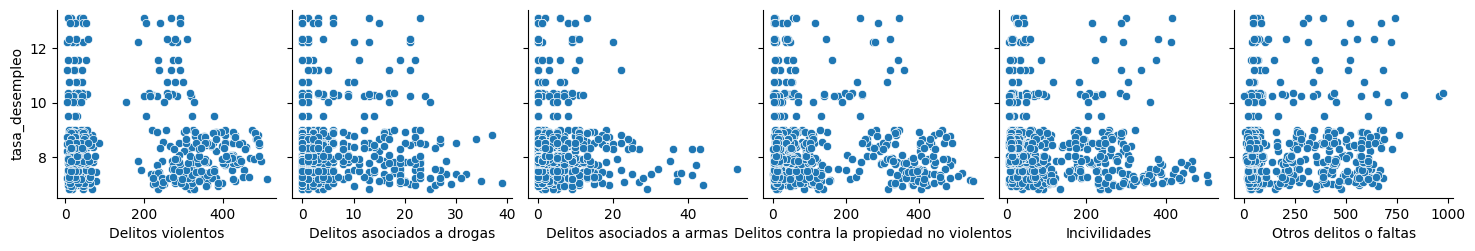

#=========================#
COMUNA - San Bernardo
#=========================#


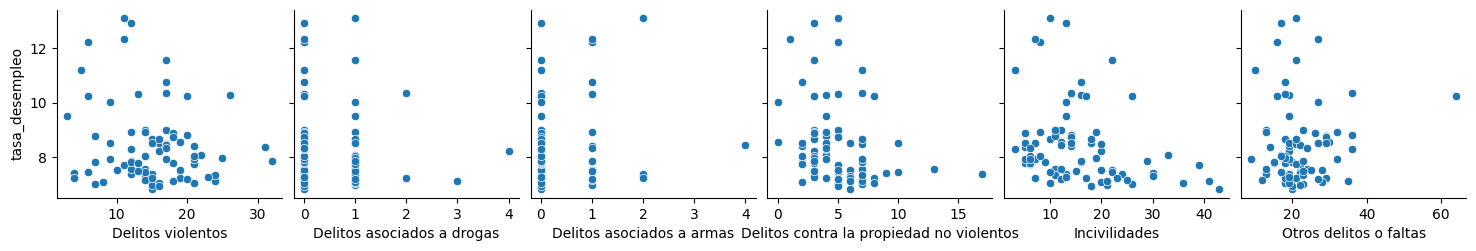

#=========================#
COMUNA - Ñuñoa
#=========================#


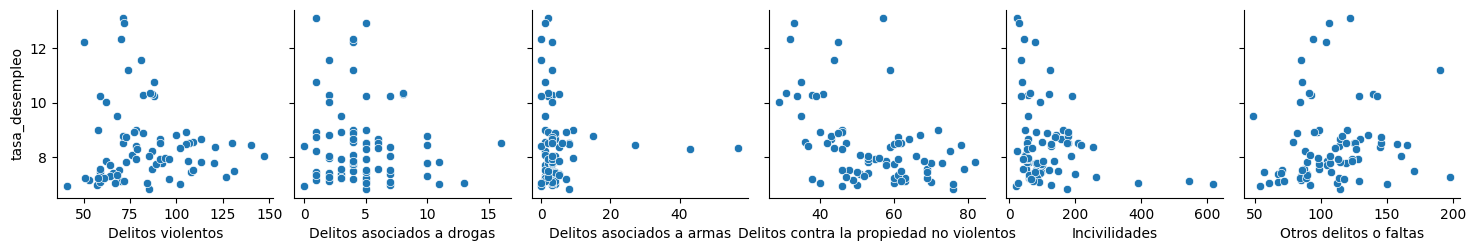

#=========================#
COMUNA - Maipú
#=========================#


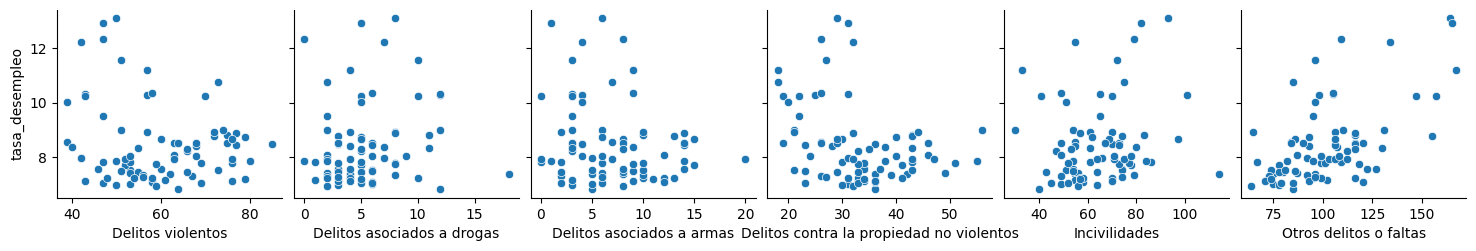

#=========================#
COMUNA - Puente Alto
#=========================#


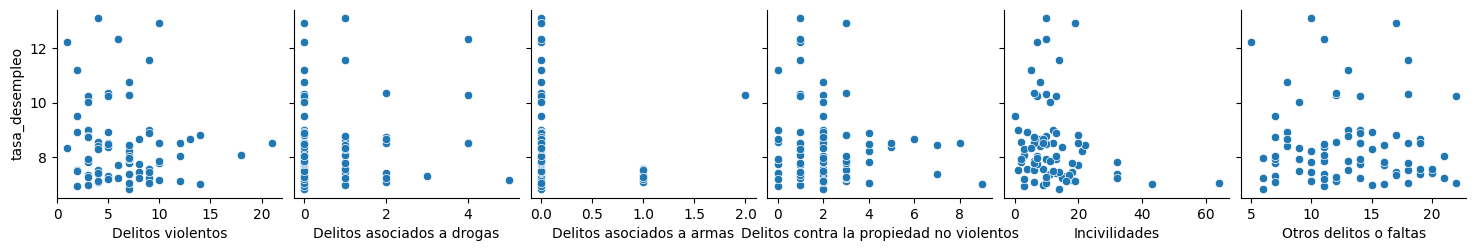

#=========================#
COMUNA - La Florida
#=========================#


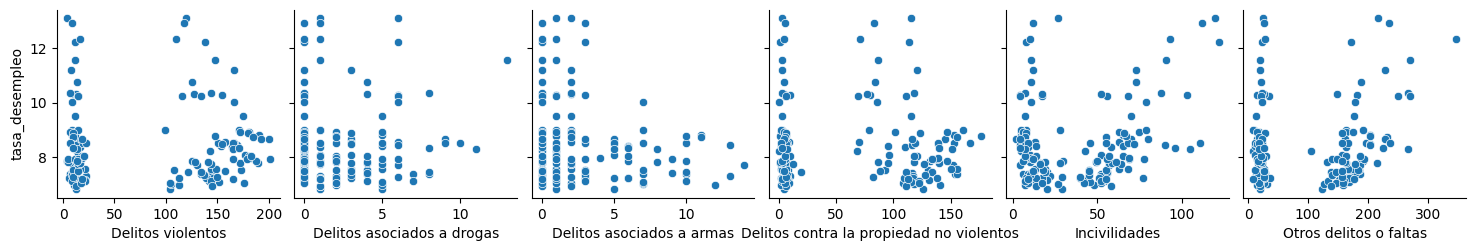

#=========================#
COMUNA - La Reina
#=========================#


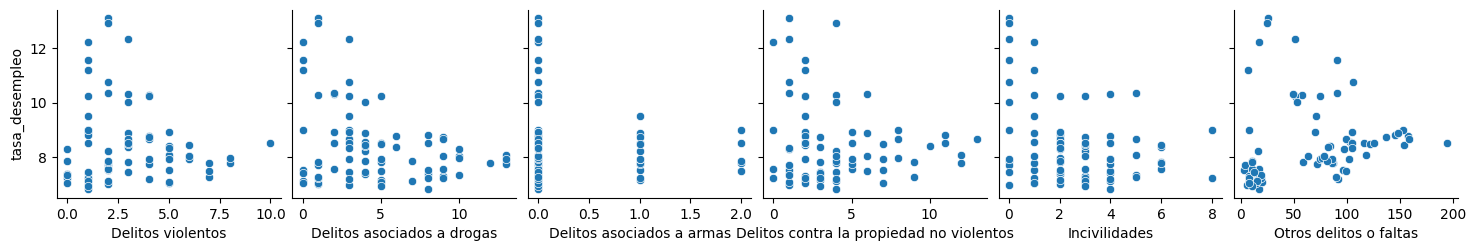

#=========================#
COMUNA - Quilicura
#=========================#


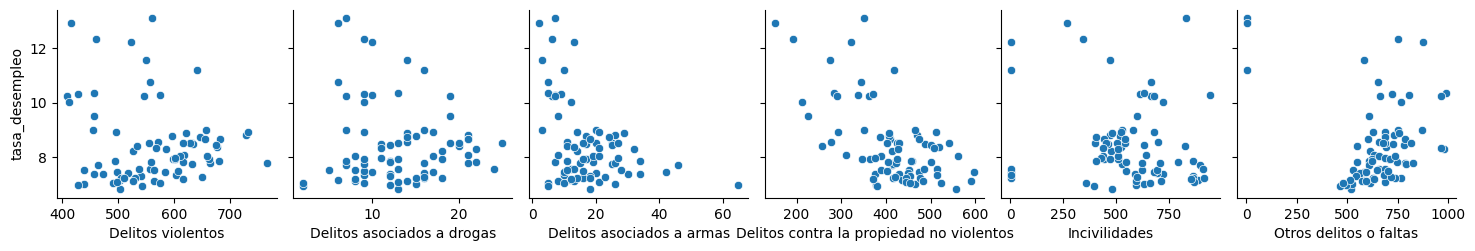

#=========================#
COMUNA - Peñalolén
#=========================#


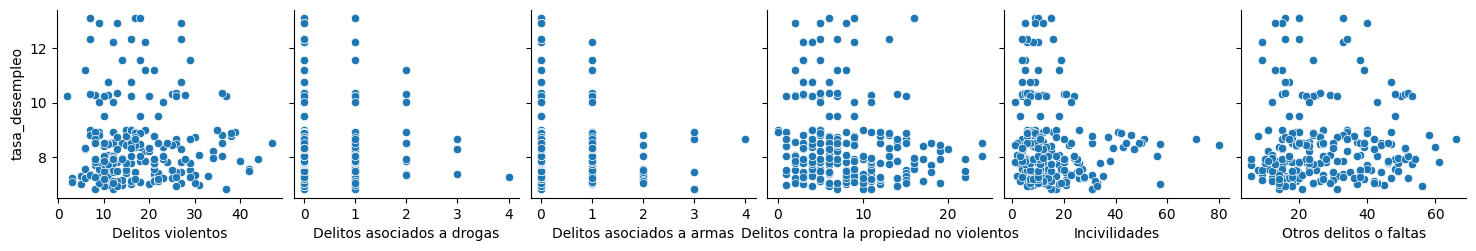

#=========================#
COMUNA - Recoleta
#=========================#


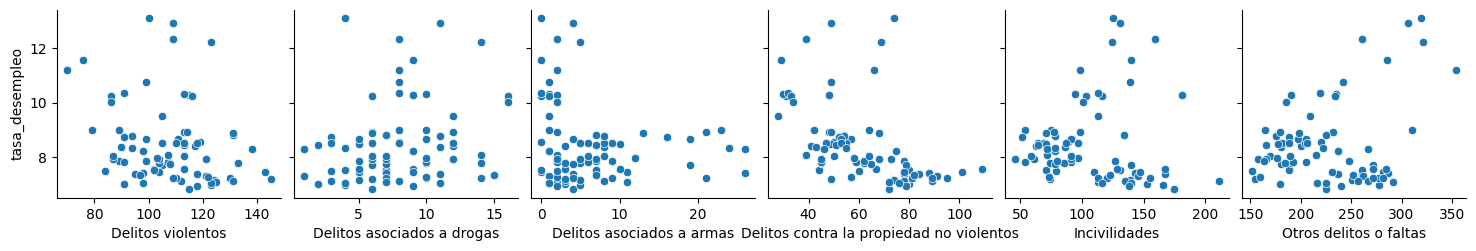

#=========================#
COMUNA - Peñaflor
#=========================#


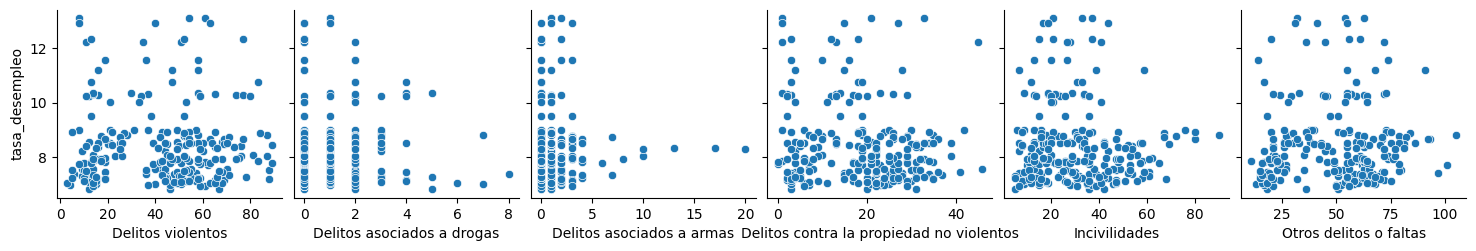

#=========================#
COMUNA - Pudahuel
#=========================#


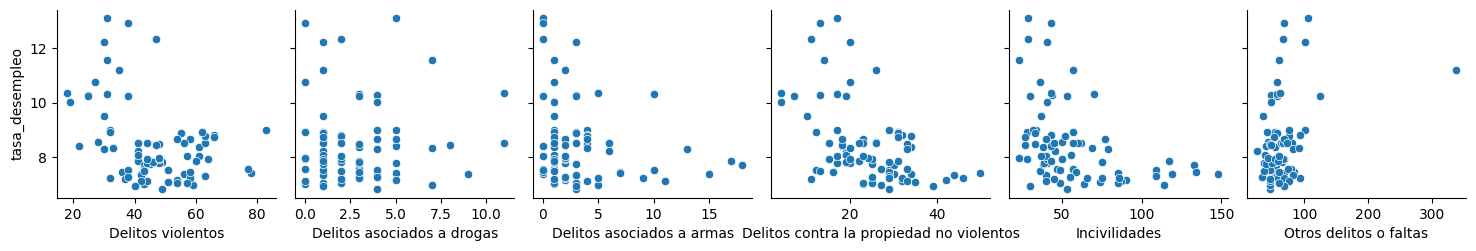

#=========================#
COMUNA - Lo Barnechea
#=========================#


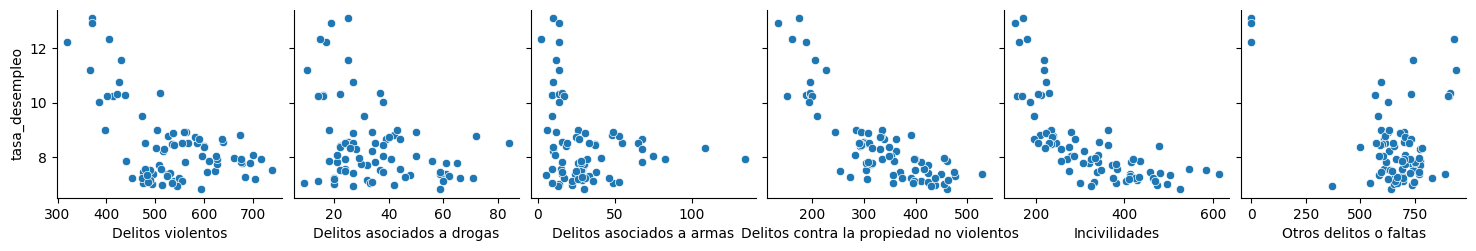

In [53]:
for i in df_ind_crime_sm["Comuna_name"].unique():
  print("#=========================#")
  print(f"COMUNA - {i}")
  print("#=========================#")
  df_it = pd.merge(left= df_economia_1[["fecha", "tasa_desempleo"]].copy(),
                 right= df_ind_crime_sm[df_ind_crime_sm["Comuna_name"] == i],
                 on= "fecha")
  sns.pairplot(df_it, y_vars="tasa_desempleo", x_vars= df_ind_crime_sm.columns[:-2])
  plt.show()

In [56]:
df_it.columns

Index(['fecha', 'tasa_desempleo', 'Delitos violentos',
       'Delitos asociados a drogas', 'Delitos asociados a armas',
       'Delitos contra la propiedad no violentos', 'Incivilidades',
       'Otros delitos o faltas', 'Comuna_name'],
      dtype='object')

#=========================#
COMUNA - Santiago
#=========================#


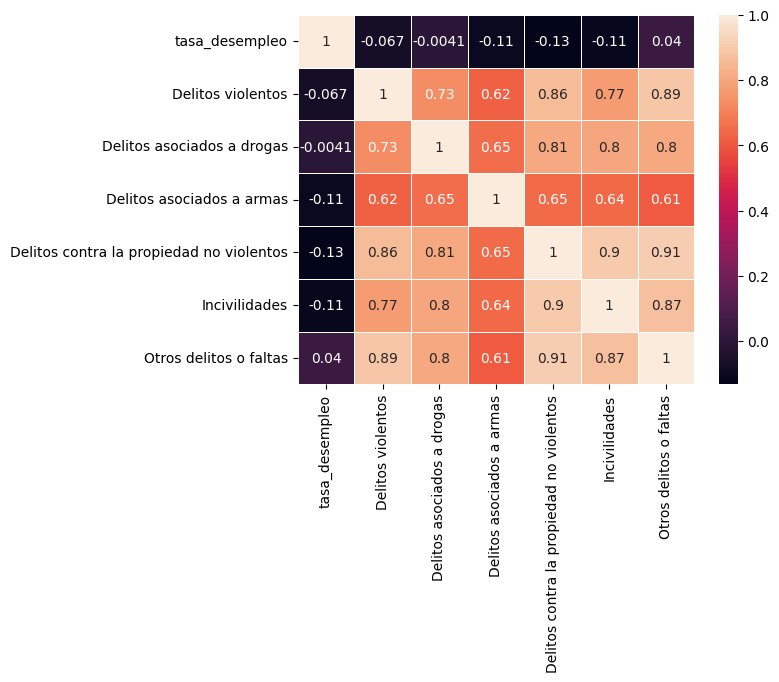

#=========================#
COMUNA - San Bernardo
#=========================#


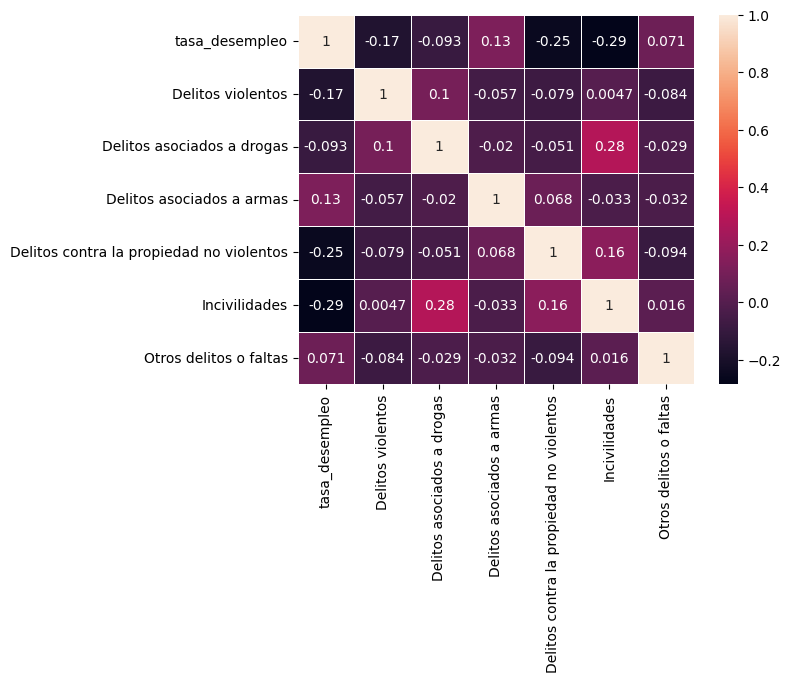

#=========================#
COMUNA - Ñuñoa
#=========================#


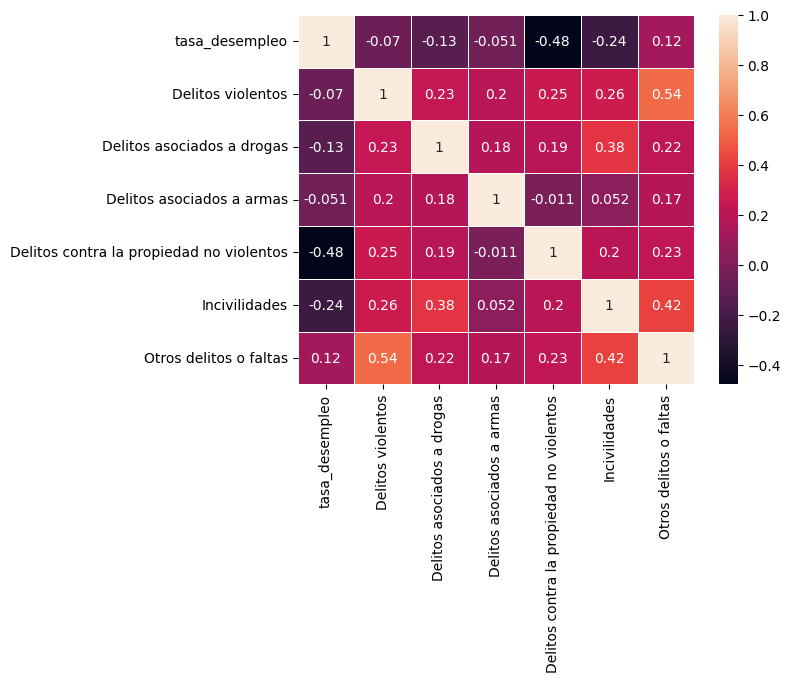

#=========================#
COMUNA - Maipú
#=========================#


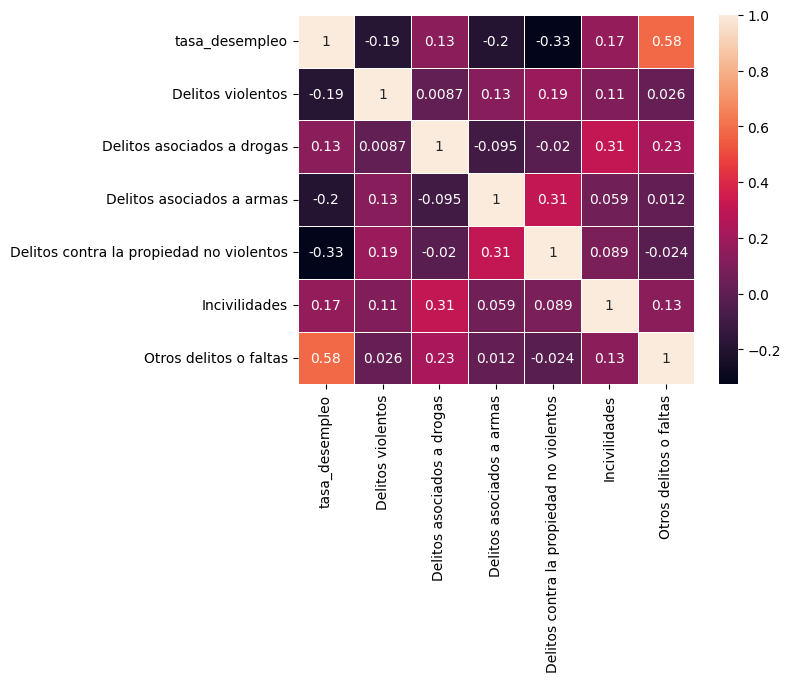

#=========================#
COMUNA - Puente Alto
#=========================#


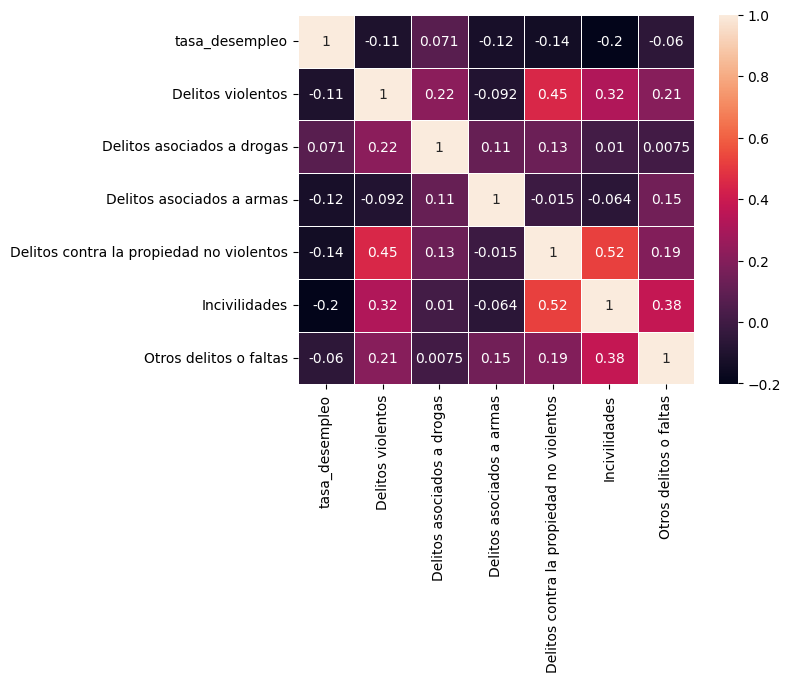

#=========================#
COMUNA - La Florida
#=========================#


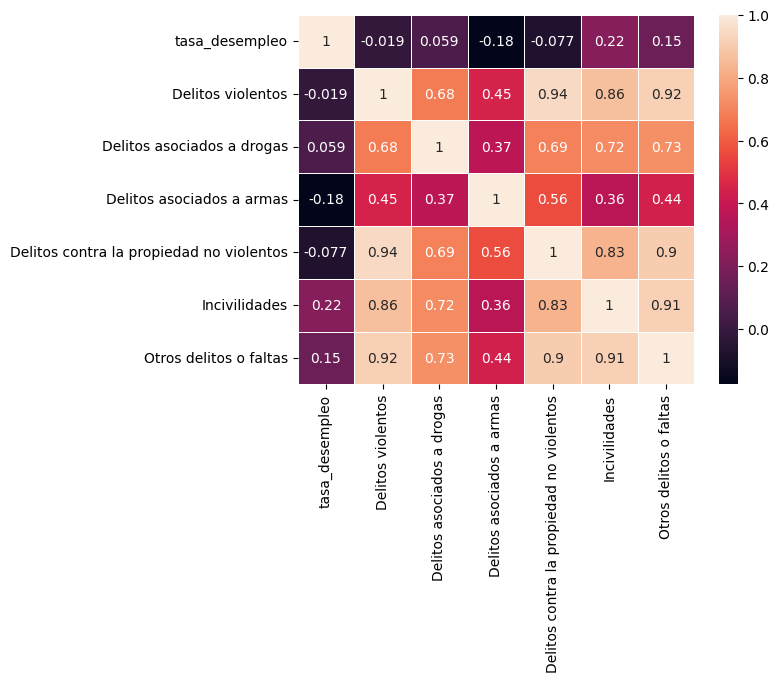

#=========================#
COMUNA - La Reina
#=========================#


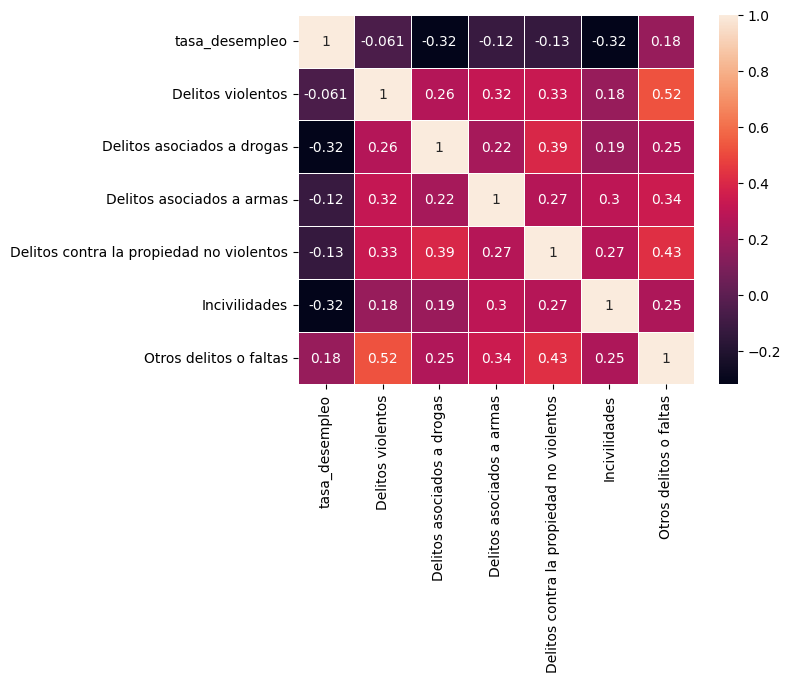

#=========================#
COMUNA - Quilicura
#=========================#


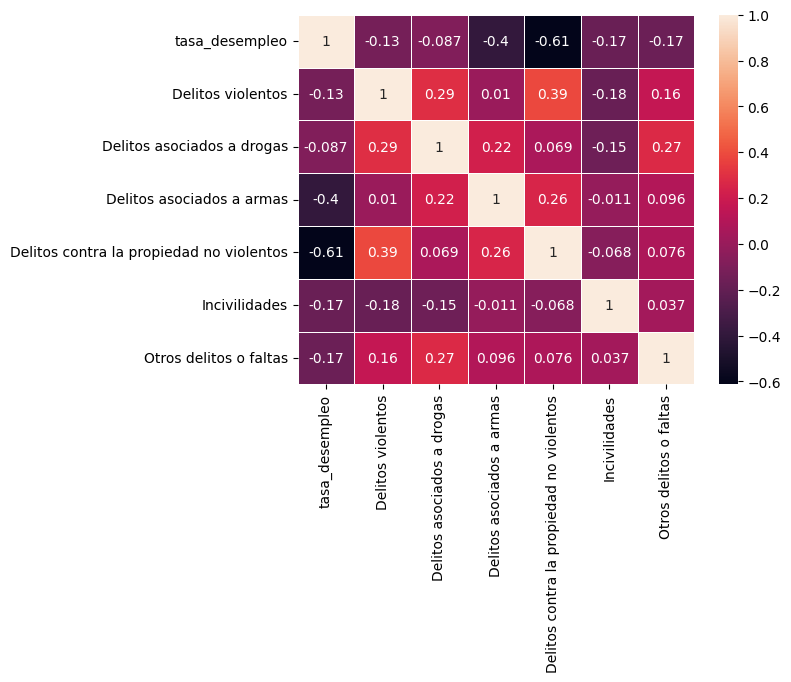

#=========================#
COMUNA - Peñalolén
#=========================#


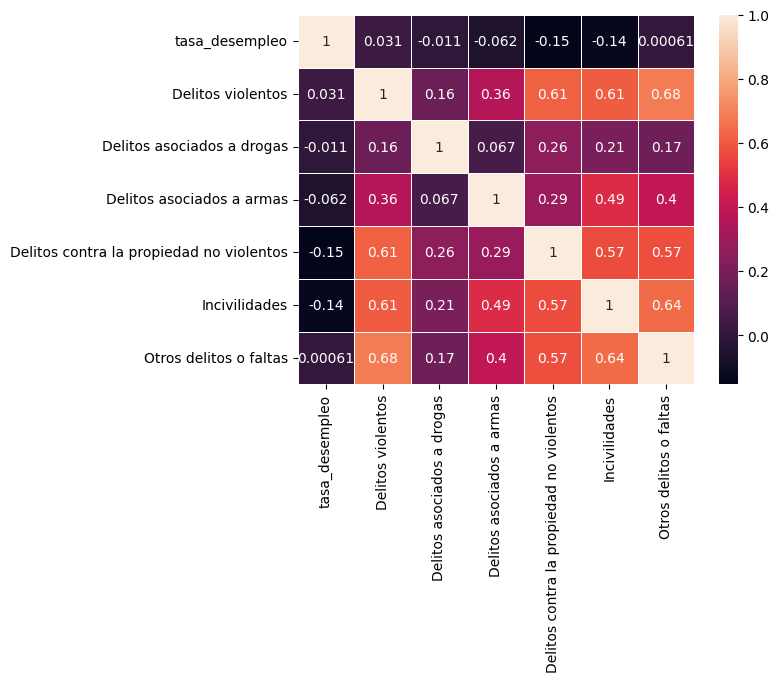

#=========================#
COMUNA - Recoleta
#=========================#


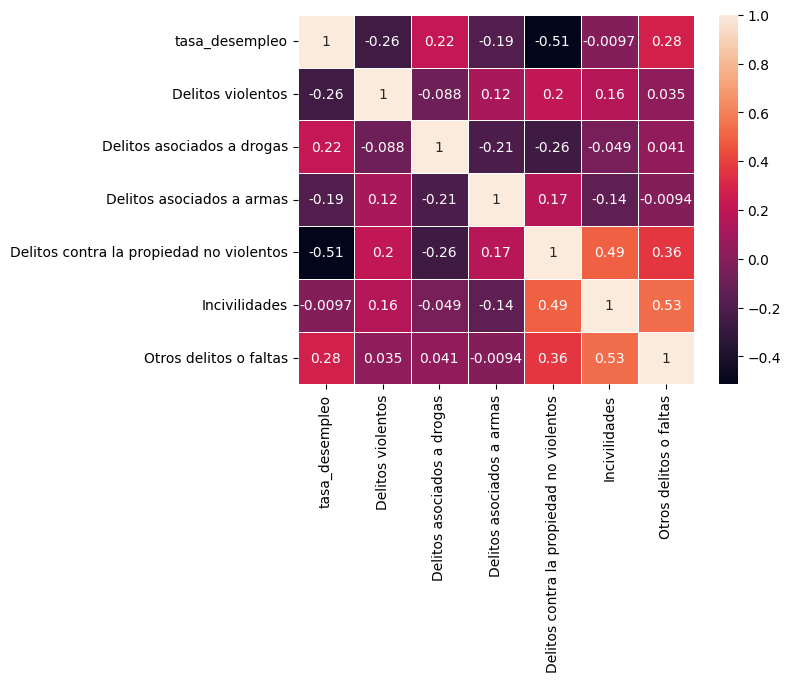

#=========================#
COMUNA - Peñaflor
#=========================#


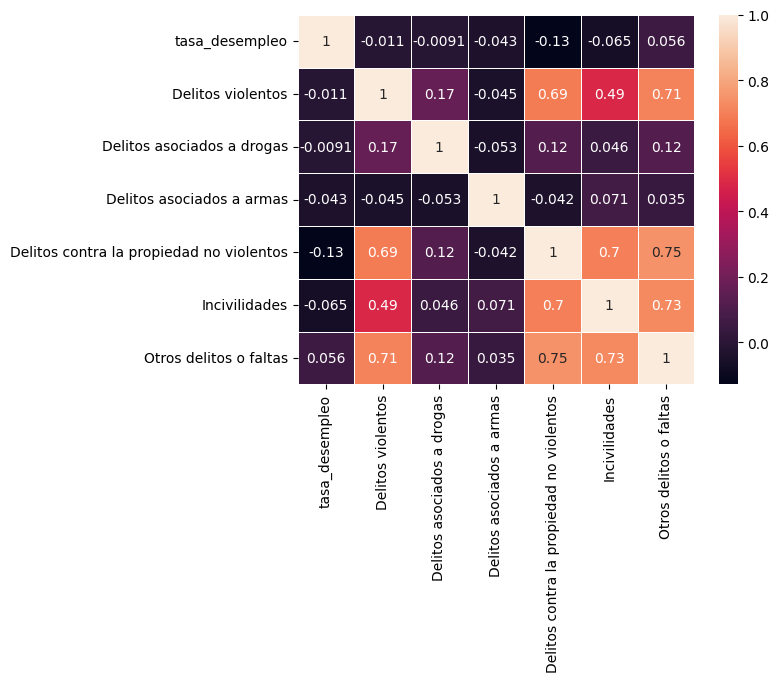

#=========================#
COMUNA - Pudahuel
#=========================#


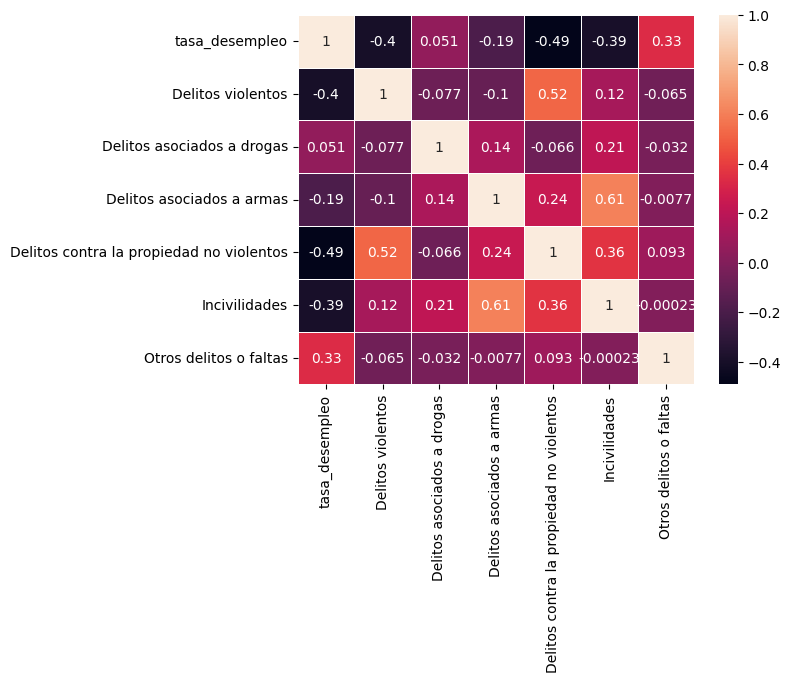

#=========================#
COMUNA - Lo Barnechea
#=========================#


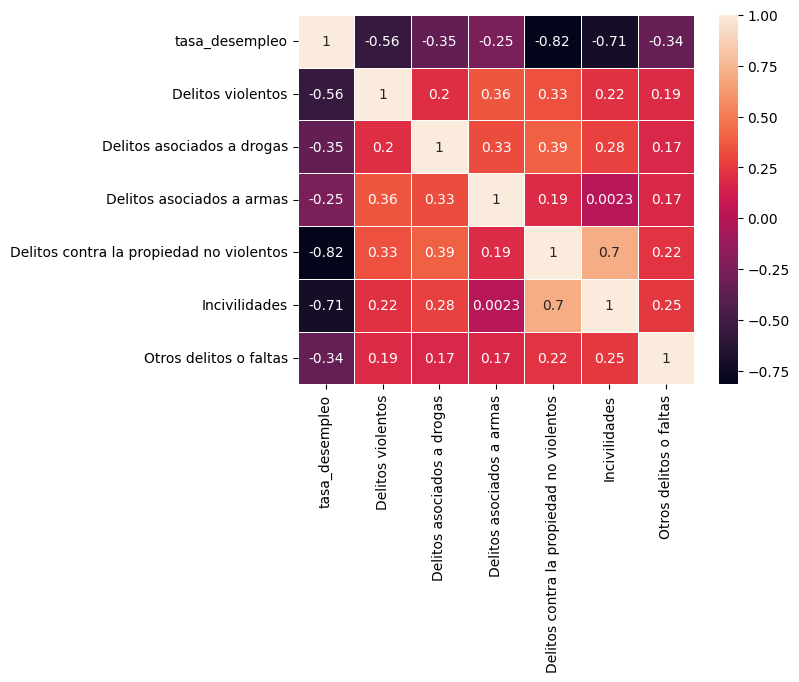

In [57]:
for i in df_ind_crime_sm["Comuna_name"].unique():
  print("#=========================#")
  print(f"COMUNA - {i}")
  print("#=========================#")
  df_it = pd.merge(left= df_economia_1[["fecha", "tasa_desempleo"]].copy(),
                 right= df_ind_crime_sm[df_ind_crime_sm["Comuna_name"] == i],
                 on= "fecha")
  correlaciones = df_it.iloc[:,1:-1].corr()
  sns.heatmap(correlaciones, annot=True, linewidth=.5)
  plt.show()

### ¿Como influye la desigualdad economica en la concentracion de delitos en diferentes comunas de la region metropolitana?

### ¿Que comunas presentan una mayor concentracion de delitos en relacion con su nivel de ingreso per capita?

#=========================#
COMUNA - Santiago
#=========================#


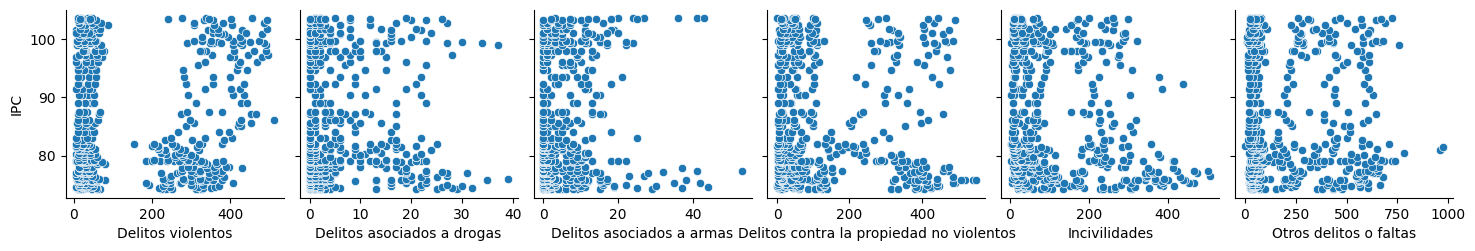

#=========================#
COMUNA - San Bernardo
#=========================#


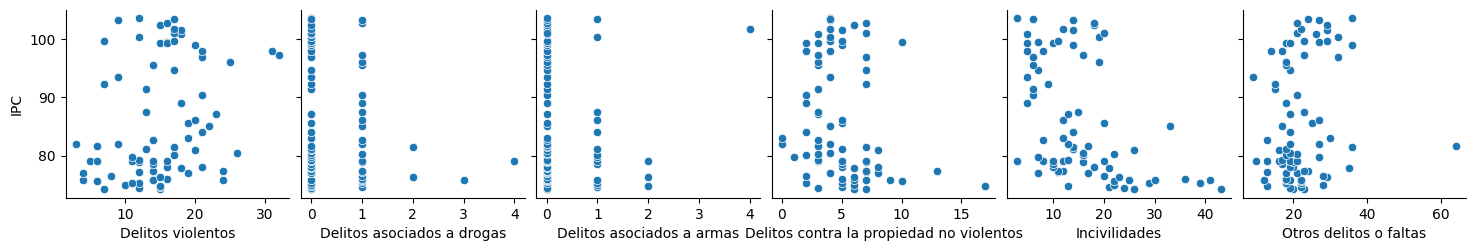

#=========================#
COMUNA - Ñuñoa
#=========================#


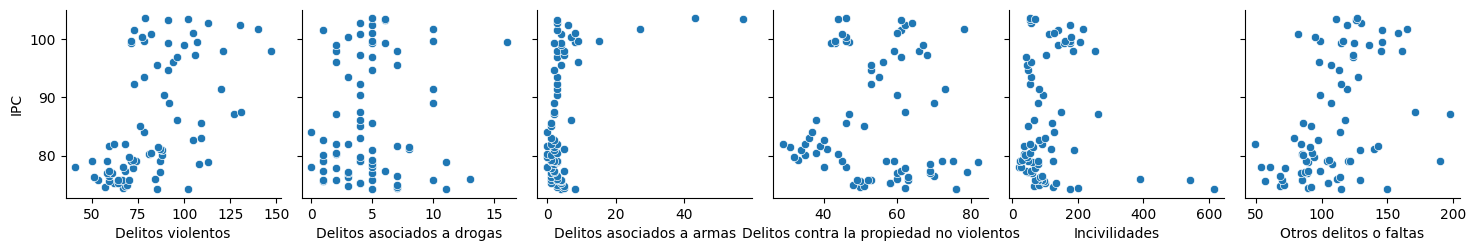

#=========================#
COMUNA - Maipú
#=========================#


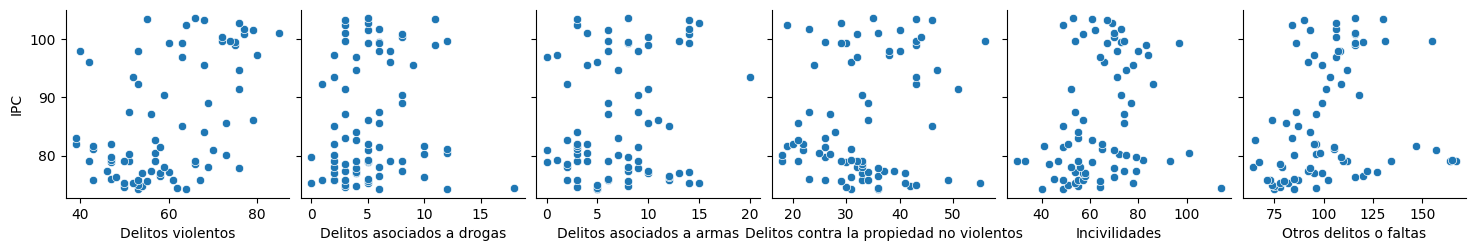

#=========================#
COMUNA - Puente Alto
#=========================#


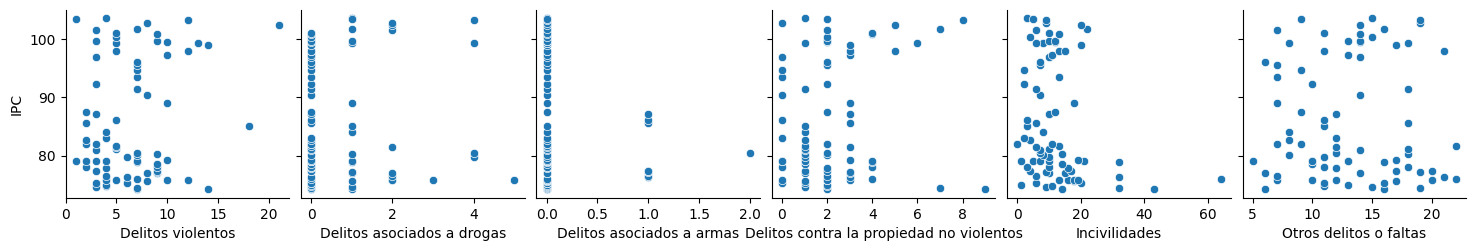

#=========================#
COMUNA - La Florida
#=========================#


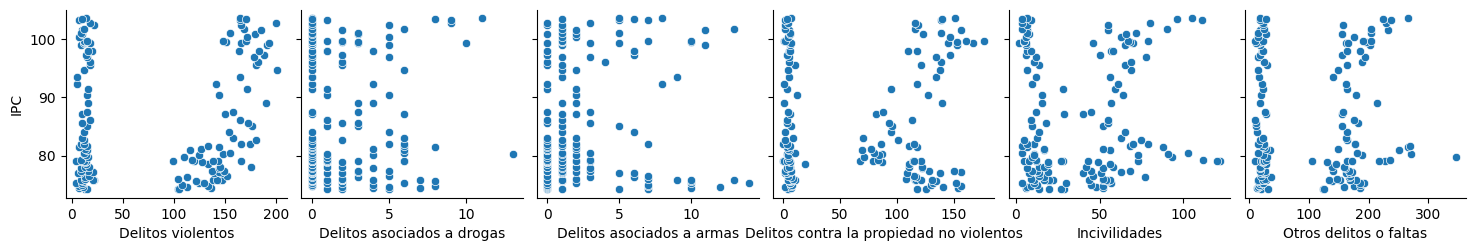

#=========================#
COMUNA - La Reina
#=========================#


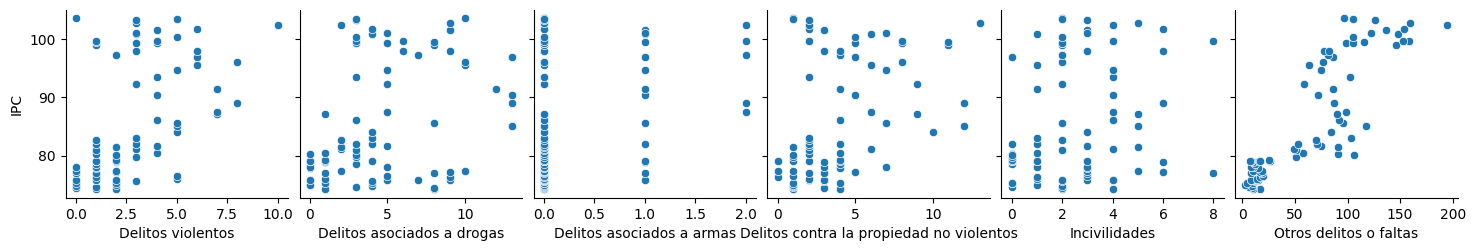

#=========================#
COMUNA - Quilicura
#=========================#


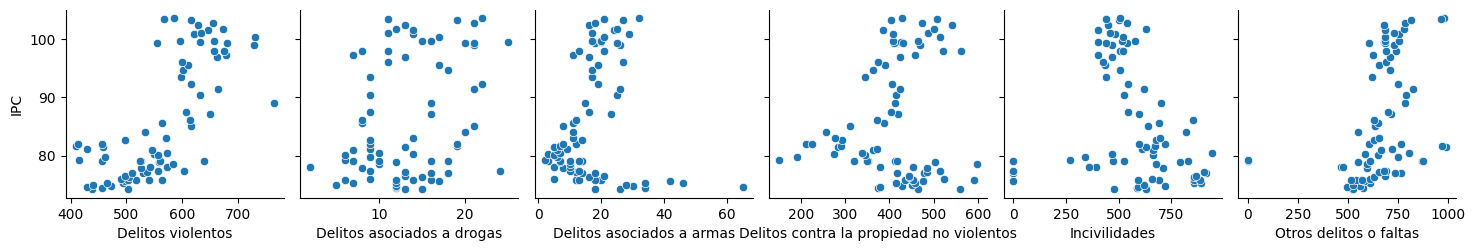

#=========================#
COMUNA - Peñalolén
#=========================#


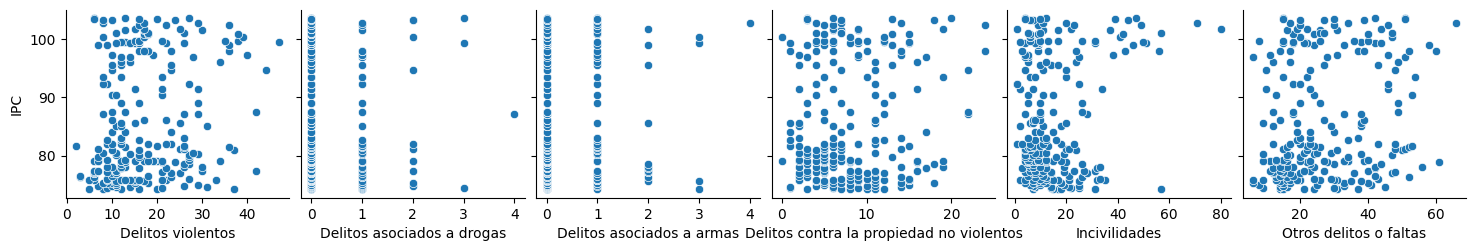

#=========================#
COMUNA - Recoleta
#=========================#


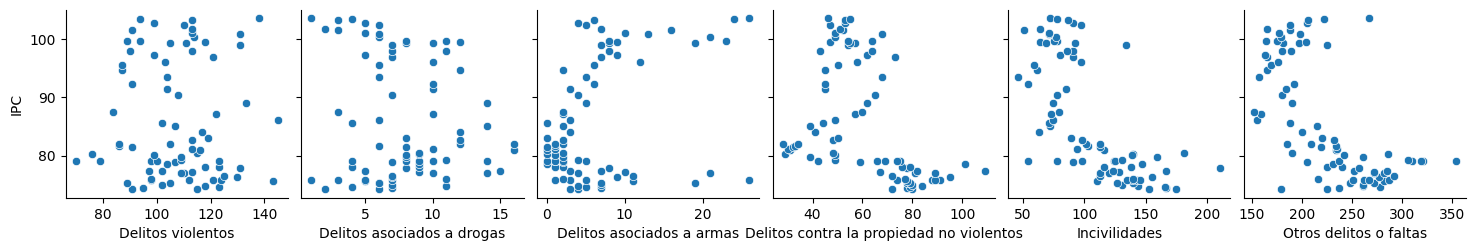

#=========================#
COMUNA - Peñaflor
#=========================#


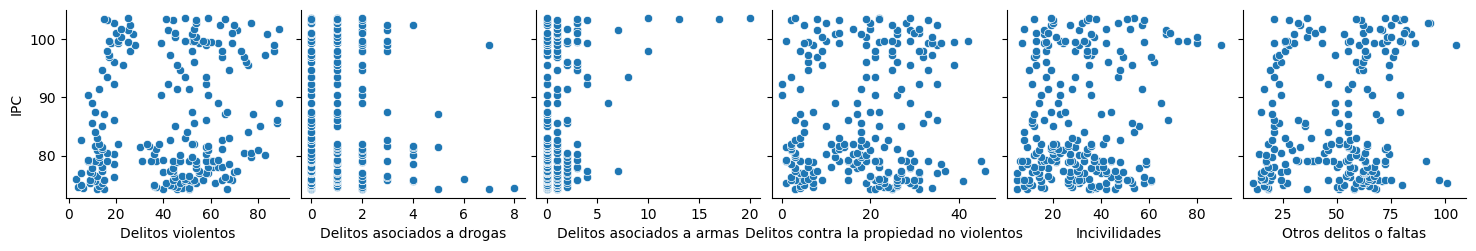

#=========================#
COMUNA - Pudahuel
#=========================#


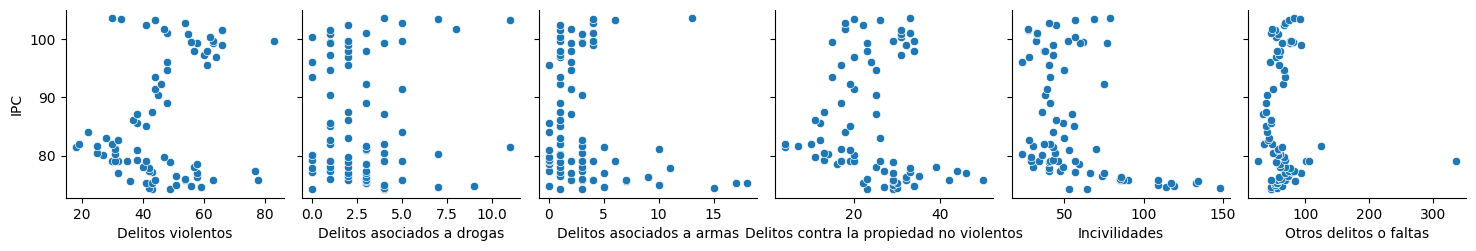

#=========================#
COMUNA - Lo Barnechea
#=========================#


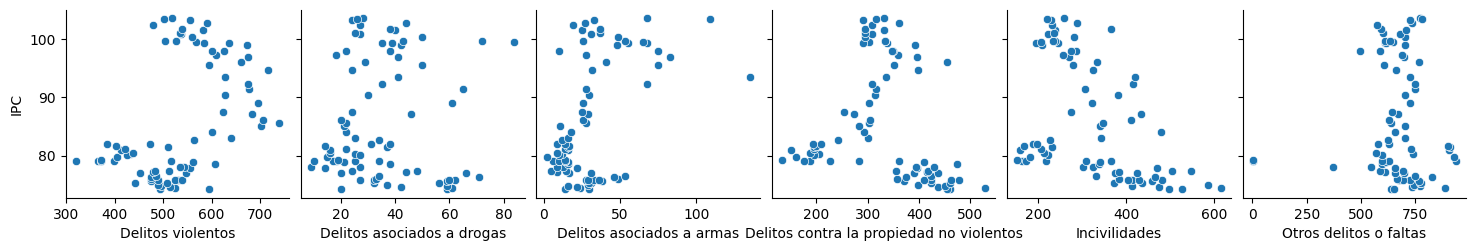

In [64]:
for i in df_ind_crime_sm["Comuna_name"].unique():
  print("#=========================#")
  print(f"COMUNA - {i}")
  print("#=========================#")
  df_it = pd.merge(left= df_economia_1[["fecha", "IPC"]].copy(),
                 right= df_ind_crime_sm[df_ind_crime_sm["Comuna_name"] == i],
                 on= "fecha")
  sns.pairplot(df_it, y_vars="IPC", x_vars= df_ind_crime_sm.columns[:-2])
  plt.show()

###  ¿Es posible predecir aumentos en la criminalidad basandose en variaciones mensuales en la tasa de inflacion y desempleo?

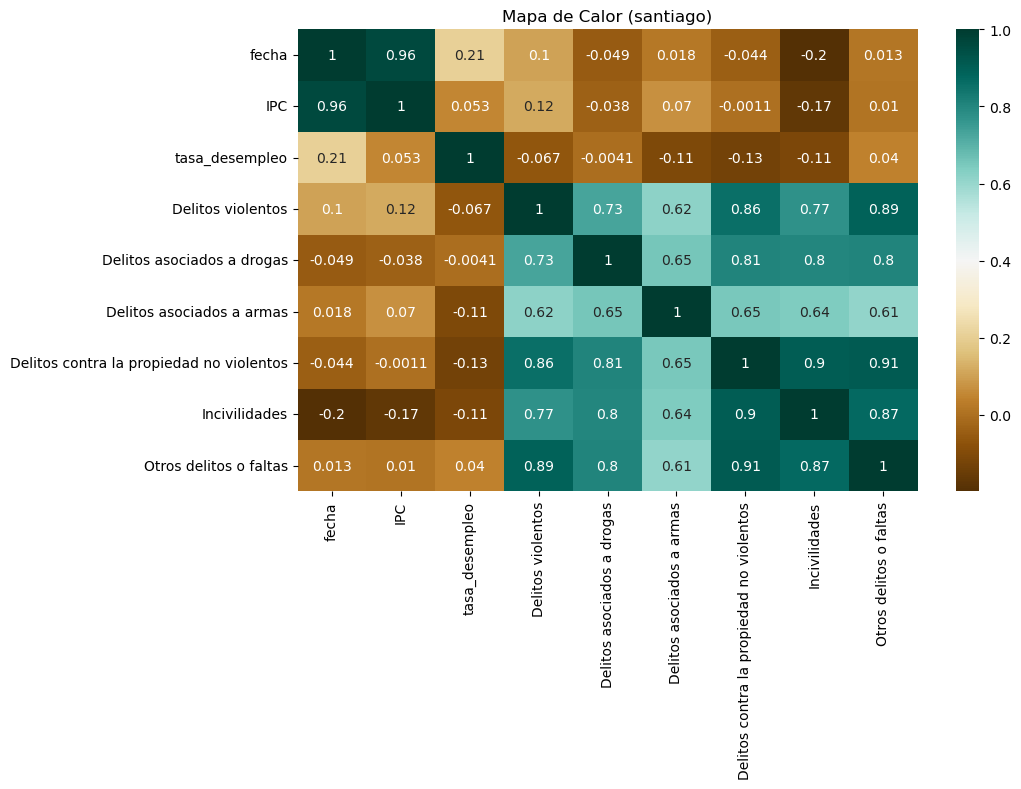

In [ ]:
# Lamentablemente, debido a las limitaciones de mi computadora, solo podré analizar este caso para una comuna.
# Por lo tanto, me centrare exclusivamente en la comuna de Santiago.

df_it = pd.merge(left= df_economia_1[["fecha", "IPC", "tasa_desempleo"]].copy(),
                 right= df_ind_crime[df_ind_crime["Comuna_name"] == 'Santiago'],
                 on= "fecha")

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df_it.iloc[:, :-1].corr(), annot=True, cmap='BrBG', ax=ax)

plt.title("Mapa de Calor (santiago)")

plt.show()

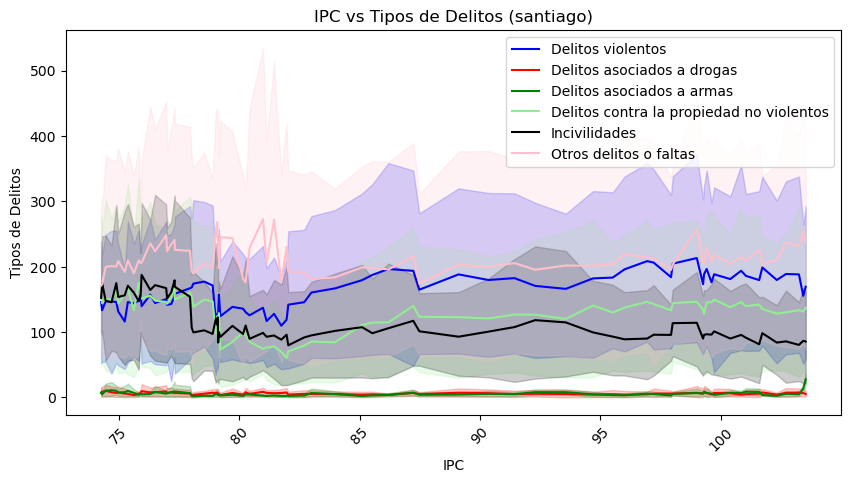

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

colores = ["blue", "red", "green", "lightgreen", "black", "pink", "yellow"]
columnas_in = ["Delitos violentos", "Delitos asociados a drogas", "Delitos asociados a armas",
                "Delitos contra la propiedad no violentos", "Incivilidades", "Otros delitos o faltas"]

for i in range(6):
    sns.lineplot(data=df_it, x="IPC", y=columnas_in[i], ax=ax, label=columnas_in[i], color=colores[i])

plt.ylabel("Tipos de Delitos")
plt.xlabel("IPC")
plt.title("IPC vs Tipos de Delitos (santiago)")

plt.legend()
plt.xticks(rotation=45)
plt.show()

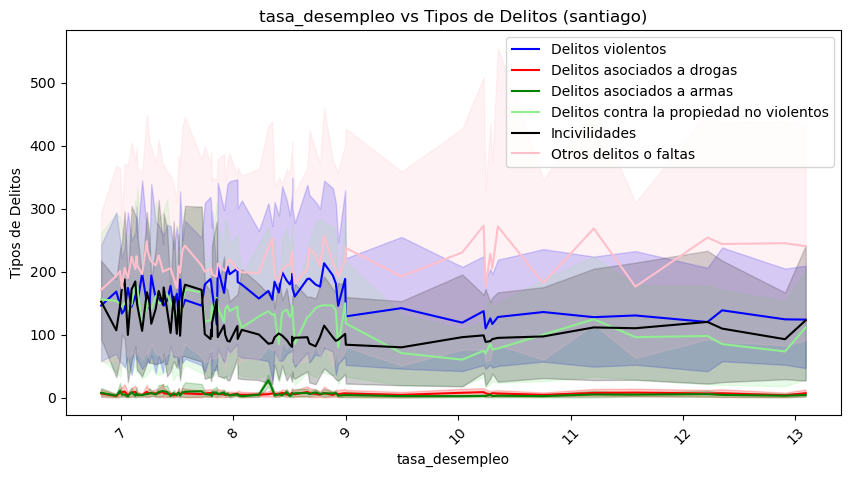

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

for i in range(6):
    sns.lineplot(data=df_it, x="tasa_desempleo", y=columnas_in[i], ax=ax, label=columnas_in[i], color=colores[i])

plt.ylabel("Tipos de Delitos")
plt.xlabel("tasa_desempleo")
plt.title("tasa_desempleo vs Tipos de Delitos (santiago)")

plt.legend()
plt.xticks(rotation=45)
plt.show()

*Respuesta:*
Gracias al gráfico de calor y al gráfico de líneas que he preparado, puedo indicar que no parece ser posible predecir un aumento de la criminalidad basándose únicamente en el IPC (Índice de Precios al Consumidor). En general, el IPC no muestra una relación significativa con los índices de criminalidad en la comuna de Santiago.

Por otro lado, en relación con la tasa de desempleo, parece que cuando los índices de desempleo son bajos, los delitos tienden a comportarse de manera más errática y alcanzan sus picos más altos. En cambio, cuando la tasa de desempleo es alta, los índices de criminalidad tienden a estabilizarse y, en algunos casos, a disminuir. Este patrón podría estar relacionado con los picos de desempleo observados durante la pandemia (2019-2020). Sin embargo, en términos generales, se observa un leve aumento de los delitos, especialmente en los delitos violentos y en la categoría de "otros delitos o faltas", cuando la tasa de desempleo crece.

En resumen, no es suficiente afirmar que es posible predecir un aumento en la criminalidad en la comuna de Santiago, al menos no a partir de factores como las tasas de desempleo o la inflación. Esto se debe a la baja correlación que ambos datos tienen con los índices de criminalidad en general.

###  ¿Existen diferencias significativas en la criminalidad entre las zonas urbanas y rurales de la region metropolitana, y que factores pueden explicarlas?

In [ ]:
df_mapa = df_mapa[df_mapa["Region"] == 'Región Metropolitana de Santiago']
df_ind_crime["cod_comuna"] = df_ind_crime["Comuna_name"].map(comunas_codigo)

df_mc = pd.merge(left=df_ind_crime, right=df_mapa, on="cod_comuna", how="outer")
df_mc.dropna(axis=0, inplace=True)

C:\Users\Jose\AppData\Local\Temp\ipykernel_14756\1235770038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ind_crime["cod_comuna"] = df_ind_crime["Comuna_name"].map(comunas_codigo)


<Axes: >

Error in callback <function _draw_all_if_interactive at 0x000001B3AC38FCE0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Date ordinal -14259274.417550001 converts to -37071-06-07T13:58:43.680000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

ValueError: Date ordinal -14259274.417550001 converts to -37071-06-07T13:58:43.680000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 640x480 with 1 Axes>